In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from openpyxl import load_workbook #openpyxl 중에서 load_workbook 함수만 사용

# 읽을 엑셀 파일
xl_file = '서울 지하철역 마스터시트 (1).xlsx'

# 엑셀 파일 불러오기
wb = load_workbook(filename = xl_file)

wb.sheetnames

ws = wb['시트1'] #시트 설정
data = ws.values

columns = next(data)[0:]
df = pd.DataFrame(data,columns=columns)

df.head()

,역사명,자치구,역위도,역경도,역사도로명주소,근처 공연장수,공연건수,예매건수,퇴근시간 하차인원(17시~1시),신용판매금액,문화예술관람,한 공연당 예매건수
0,가락시장,송파구,37.49277,127.1179,서울특별시 송파구 송파대로 지하 257 (가락동),3.0,144.0,314120.0,2601550.0,1801.0,4.8,6544.167
1,가산디지털단지,금천구,37.48122,126.8826,서울특별시 금천구 벚꽃로 309 (가산동),7.0,52.0,18582.0,1986397.0,1092.0,7.0,2501.423
2,강남,강남구,37.49720,127.0281,서울특별시 강남구 강남대로 지하 396 (역삼동),32.0,717.0,729016.0,8523024.0,2326.0,9.0,32536.280
3,강남구청,강남구,37.51715,127.0412,서울특별시 강남구 학동로 지하346 (삼성동),32.0,166.0,254494.0,1074613.0,2326.0,9.0,49059.080
4,강동,강동구,37.53588,127.1321,서울특별시 강동구 천호대로 지하1097 (천호동),3.0,31.0,30650.0,3522083.0,1518.0,4.1,2966.129


In [3]:
df.info() # 정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 12 columns):
역사명                  234 non-null object
자치구                  234 non-null object
역위도                  234 non-null float64
역경도                  234 non-null float64
역사도로명주소              234 non-null object
근처 공연장수              234 non-null float64
공연건수                 234 non-null float64
예매건수                 234 non-null float64
퇴근시간 하차인원(17시~1시)    234 non-null float64
신용판매금액               234 non-null float64
문화예술관람               234 non-null float64
한 공연당 예매건수           230 non-null float64
dtypes: float64(9), object(3)
memory usage: 27.2+ KB


In [4]:
pd.set_option('max_rows',235)
df['신용판매금액'].isnull() # 결측치 확인

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [5]:
df = df.dropna(axis=0) #결측치 제거

In [6]:
df.info() #정보확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 233
Data columns (total 12 columns):
역사명                  230 non-null object
자치구                  230 non-null object
역위도                  230 non-null float64
역경도                  230 non-null float64
역사도로명주소              230 non-null object
근처 공연장수              230 non-null float64
공연건수                 230 non-null float64
예매건수                 230 non-null float64
퇴근시간 하차인원(17시~1시)    230 non-null float64
신용판매금액               230 non-null float64
문화예술관람               230 non-null float64
한 공연당 예매건수           230 non-null float64
dtypes: float64(9), object(3)
memory usage: 23.4+ KB


In [7]:
df.shape 

(230, 12)

In [8]:
df['신용판매금액'].describe() #기초통계량

count     230.000000
mean     1567.321739
std       347.827808
min      1092.000000
25%      1320.000000
50%      1476.500000
75%      1631.250000
max      2336.000000
Name: 신용판매금액, dtype: float64

In [9]:
df['신용판매금액'].value_counts() # 변수의 편향성

1801.0    22
2326.0    21
1196.0    17
1586.0    14
1599.0    13
1445.0    11
1486.0    11
1518.0    11
1320.0    11
1456.0    11
2336.0    10
1312.0     9
1382.0     9
1339.0     9
1620.0     8
1262.0     8
1172.0     7
1467.0     7
1201.0     5
1635.0     5
1254.0     4
1273.0     4
1326.0     2
1092.0     1
Name: 신용판매금액, dtype: int64

In [10]:
df['신용판매금액'].dtype #타입 확인

dtype('float64')

In [11]:
# 한글 폰트
from matplotlib import font_manager, rc

font_path = 'c:/Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '자치구별 신용판매금액')

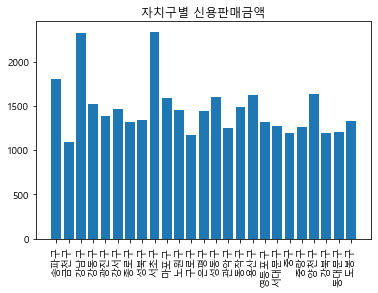

In [12]:
plt.bar(df['자치구'],df['신용판매금액']) #바차트
plt.xticks(rotation=90)
plt.title('자치구별 신용판매금액')

Text(0.5, 1.0, '자치구별 문화예술관람 비율')

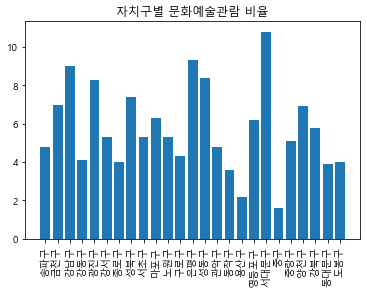

In [13]:
plt.bar(df['자치구'],df['문화예술관람']) #바차트
plt.xticks(rotation=90)
plt.title('자치구별 문화예술관람 비율')

Text(0, 0.5, '수')

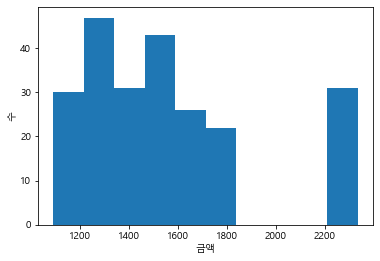

In [14]:
plt.hist(df['신용판매금액']) # 금액분포 시각화
plt.xlabel('금액')
plt.ylabel('수')

Text(0, 0.5, '수')

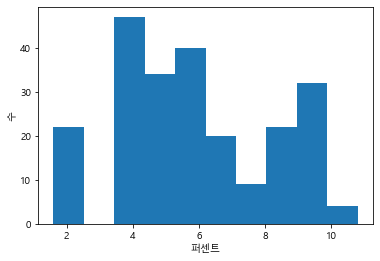

In [15]:
plt.hist(df['문화예술관람']) # 문화예술관람분포 시각화
plt.xlabel('퍼센트')
plt.ylabel('수')